In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data.csv')

In [5]:
del data['Unnamed: 32']

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [15]:
classifier = Sequential()

In [24]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(16, activation='relu', input_dim=30, kernel_initializer='random_uniform'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [25]:
# Adding the second hidden layer
classifier.add(Dense(16, kernel_initializer='random_uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [27]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))



In [28]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

Epoch 1/150
6/6 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.6191
Epoch 2/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.6289
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.6289
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.6289
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6289
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.6289
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6387
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.7031
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.7969
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.8711
Epoch 11/150
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9941
Epoch 85/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9863
Epoch 86/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9941
Epoch 87/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9902
Epoch 88/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9961
Epoch 89/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9922
Epoch 90/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9941
Epoch 91/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 92/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9922
Epoch 93/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9941
Epoch 94/150
6/6 [===============

In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [34]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 96.49122807017544%


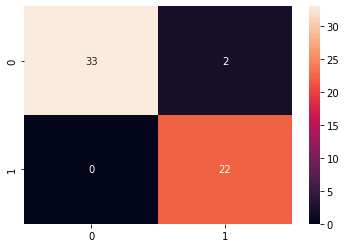

In [35]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [44]:
list(reversed(range(1,11)))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [41]:
my_list

[2, 'apple', 3.5]